In [1]:
import molsysmt as msm
msm.config.set_default_standard_units(standards=['nm', 'ps', 'K', 'mole', 'amu', 'e',
                                      'kcal/mol', 'kcal/(mol*nm**2)', 'N', 'degrees'])

import numpy as np

In [2]:
from matplotlib import pyplot as plt
from nglview.color import _ColorScheme
from matplotlib.colors import Normalize, to_hex
from matplotlib import cm

In [3]:
molecular_system = msm.convert(msm.systems.demo['Barnase-Barstar']['barnase_barstar.msmpk'])

In [4]:
msm.info(molecular_system, element='molecule')

index,name,type,n atoms,n groups,n components,chain index,entity index,entity name
0,Barnase,protein,1727,110,1,0,0,Barnase
1,Barstar,protein,1432,89,1,1,1,Barstar


In [5]:
msm.molecular_mechanics.potential_energy_minimization(molecular_system)

In [6]:
msm.molecular_mechanics.get_potential_energy(molecular_system, decomposition=True)

{'HarmonicBondForce': 98.05514479686379 <Unit('kilocalorie / mole')>,
 'PeriodicTorsionForce': 2278.0981118546842 <Unit('kilocalorie / mole')>,
 'NonbondedForce': -8720.456650334607 <Unit('kilocalorie / mole')>,
 'CMMotionRemover': 0.0 <Unit('kilocalorie / mole')>,
 'HarmonicAngleForce': 403.4416242493726 <Unit('kilocalorie / mole')>}

In [7]:
U12 = msm.molecular_mechanics.get_non_bonded_potential_energy(molecular_system,
                                                              selection='molecule_name=="Barnase"',
                                                              selection_2='molecule_name=="Barstar"')

In [8]:
U12

-757.200981417304 <Unit('kilocalorie / mole')>

In [9]:
U12_groups = msm.molecular_mechanics.get_non_bonded_potential_energy(molecular_system,
                                                              selection='all in groups of molecule_name=="Barnase"',
                                                              selection_2='all in groups of molecule_name=="Barstar"')

In [10]:
U12_groups

Magnitude,[[21.696017759479936 8.179757608738273 0.01939076994390834 ... -0.0951230867870907 0.022071269456560707 -7.030069486132999] [-0.9123070973967047 -0.27970191853452137 0.0007749743488960922 ... 0.004934307266147825 0.00015681833883544454 0.19781904056468838] [0.31924931542595303 0.1019209794287016 0.000441279511606716 ... -0.0027060280794395314 0.0009336161567877629 -0.08451779075607971] ... [17.426003917453393 7.592684452210055 0.04854439321485122 ... -0.11799303569027844 0.09352937483194909 -7.726091271832614] [0.25712554814938604 0.0974990669673533 0.0003519295278516372 ... -0.0029230208971304373 0.0016183287874006632 -0.09140138644333323] [-0.07949595697523303 -0.2670433963461998 0.0028190831609255494 ... 0.010342716486914436 -0.01765118046426864 0.5024368402834832]]
Units,kilocalorie/mole


/home/diego/Myopt/miniconda3/envs/MolSysMT@uibcdf_3.10/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:709: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  x = np.array(x, subok=True, copy=copy)


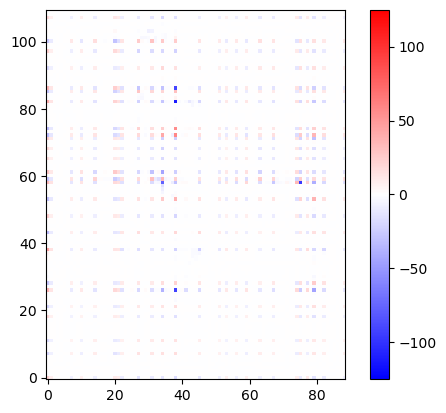

In [11]:
plt.imshow(U12_groups, origin='lower', cmap='bwr', vmin=-125, vmax=125)
plt.colorbar()
plt.show()

In [14]:
mask = np.absolute(msm.pyunitwizard.get_value(U12_groups))>1.0
np.sum(mask)

855

In [17]:
mask = msm.pyunitwizard.get_value(U12_groups)<-10.0
np.sum(mask)

226

In [ ]:
np.sum(U12_groups[mask])/U12

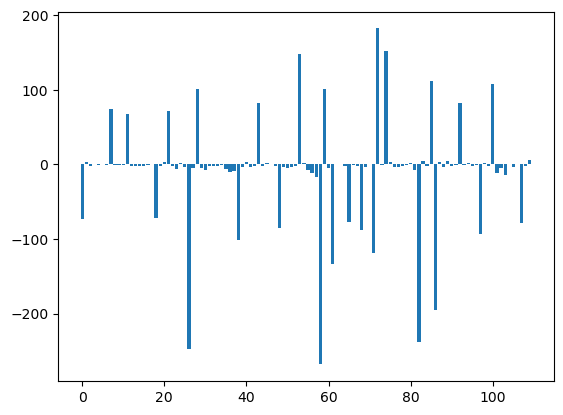

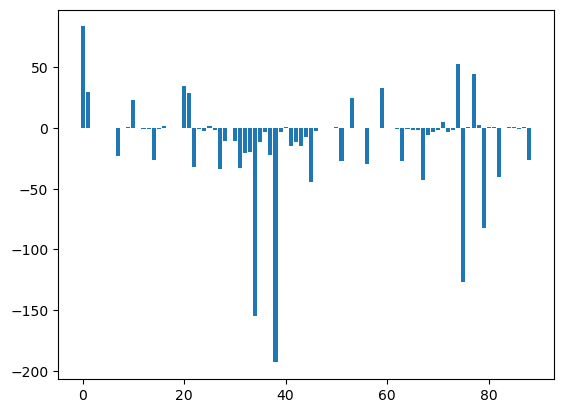

In [18]:
U12_1_groups= U12_groups.sum(axis=1)
U12_2_groups= U12_groups.sum(axis=0)

plt.bar(np.arange(U12_1_groups.shape[0]), msm.pyunitwizard.get_value(U12_1_groups))
plt.show()

plt.bar(np.arange(U12_2_groups.shape[0]), msm.pyunitwizard.get_value(U12_2_groups))
plt.show()

In [19]:
distance = msm.structure.get_distances(molecular_system, selection='all in groups of molecule_name=="Barnase"',
                 selection_2='all in groups of molecule_name=="Barstar"')

/home/diego/Myopt/miniconda3/envs/MolSysMT@uibcdf_3.10/lib/python3.10/site-packages/numpy/ma/core.py:2820: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  _data = np.array(data, dtype=dtype, copy=copy,


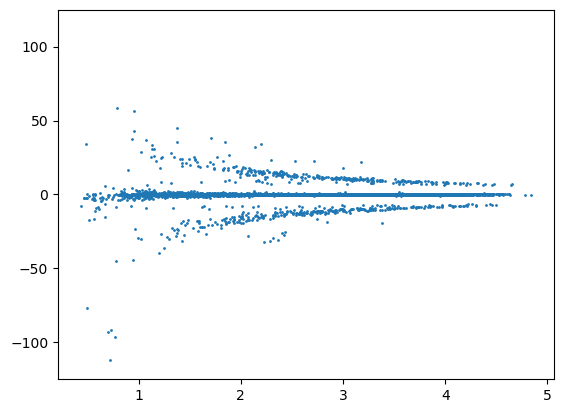

In [20]:
plt.scatter(distance.flatten(), U12_groups.flatten(), s=1.0)
plt.ylim([-125.0, 125.0])
plt.show()

In [21]:
aux = [ii for ii in msm.pyunitwizard.get_value(U12_1_groups)]
aux += [ii for ii in msm.pyunitwizard.get_value(U12_2_groups)]
aux = np.array(aux)
max_abs_val = max(abs(aux.min()), abs(aux.max()))

In [22]:
cmap = plt.colormaps['bwr']
vmin = -max_abs_val
vmax = max_abs_val

norm = Normalize(vmin=vmin,vmax=vmax)
scheme = _ColorScheme([[to_hex(cmap(norm(ii))), str(jj)] for ii,jj in zip(aux, range(len(aux)))], label='user')

In [23]:
view = msm.view(molecular_system)
view.clear()
view.add_cartoon(selection='all', color=scheme)
view

NGLWidget()